<center><h1>Last_First_HW8</h1></center>

Name: Raj Vijay Maharajwala
<br>
Github Username: raj-maharajwala
<br>
USC ID: 4863364966

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [93]:
import re
import pandas as pd
import numpy as np
import urllib
import operator
from sklearn import preprocessing
from beautifultable import BeautifulTable
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
import random
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from statistics import mean
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [44]:
with open('../data/wdbc.names', 'r') as f:
    content = f.readlines()
merge = ' | '.join(content)
pattern = r'\s+[a-z]\) ([a-z]+(?:\s[a-z]+)?)'
features = re.findall(pattern, merge)
features = [measure+'_'+feat for measure in ['mean', 'se', 'worst'] for feat in features]
columnNames = ['ID','Class'] + features
print(columnNames)

['ID', 'Class', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave points', 'mean_symmetry', 'mean_fractal dimension', 'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave points', 'se_symmetry', 'se_fractal dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave points', 'worst_symmetry', 'worst_fractal dimension']


In [45]:
data = pd.read_csv('../data/wdbc.data', names=columnNames)
data

,ID,Class,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [46]:
minMaxScaler = preprocessing.MinMaxScaler()
normalizedData = minMaxScaler.fit_transform(data[features])
normalizedData = pd.DataFrame(normalizedData, columns=features)
normalizedData = pd.concat([normalizedData, data['Class']], axis=1)

malignData = pd.DataFrame()
benignData = pd.DataFrame()
cnt = 0
for i in range(0, len(normalizedData)):
    if data['Class'][i]=='M':
        malignData = pd.concat([malignData, data[i:i+1]])
    elif data['Class'][i]=='B':
        benignData = pd.concat([benignData, data[i:i+1]])
        
totalMalignCnt = malignData.shape[0]
totalBenignCnt = benignData.shape[0]
print('Total Malign Data:', totalMalignCnt)
print('Total Benign Data:', totalBenignCnt)

testMalignCnt = 43
testBenignCnt = 72
testMalign = malignData[0:testMalignCnt]
trainMalign = malignData[testMalignCnt:]
print('Total Train Malign Observations:', trainMalign.shape[0])
display(trainMalign)

Total Malign Data: 212
Total Benign Data: 357
Total Train Malign Observations: 169


,ID,Class,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
53,857392,M,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,...,20.60,24.13,135.1,1321.0,0.1280,0.2297,0.2623,0.1325,0.3021,0.07987
54,857438,M,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,...,18.10,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873
56,857637,M,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,...,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294
57,857793,M,14.71,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,...,17.87,30.70,115.7,985.5,0.1368,0.4290,0.3587,0.1834,0.3698,0.10940
62,858986,M,14.25,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.08653,...,17.67,29.51,119.1,959.5,0.1640,0.6247,0.6922,0.1785,0.2844,0.11320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [50]:
testBenign = benignData[0:testBenignCnt]
trainBenign = benignData[testBenignCnt:]
print('Train Benign shape:', trainBenign.shape)
display(trainBenign.head())

print('\nTest Benign Shape:', testBenign.shape)
display(testBenign.head())

Train Benign shape: (285, 32)


,ID,Class,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
155,8711003,B,12.25,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.023310,...,13.59,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
157,8711216,B,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.027710,...,18.22,28.07,120.30,1032.0,0.08774,0.17100,0.18820,0.08436,0.2527,0.05972
158,871122,B,12.06,12.74,76.84,448.6,0.09311,0.05241,0.01972,0.019630,...,13.14,18.41,84.08,532.8,0.12750,0.12320,0.08636,0.07025,0.2514,0.07898
159,871149,B,10.90,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,...,12.36,18.20,78.07,470.0,0.11710,0.08294,0.01854,0.03953,0.2738,0.07685
160,8711561,B,11.75,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.037380,...,13.32,26.21,88.91,543.9,0.13580,0.18920,0.19560,0.07909,0.3168,0.07987



Test Benign Shape: (72, 32)


,ID,Class,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


### (b) Monte-Carlo Simulation

In [75]:
def safe_divide(numerator, denominator):
    if denominator == 0:
        return 0
    return numerator/denominator

def getConfusionMatrix(predictedClass, actualClass):
    tn, fp, fn, tp = [sum(x) for x in zip(*[(p == 'M', a != 'M', p == 'M' and a != 'M', p != 'M' and a == 'M') for p, a in zip(predictedClass, actualClass)])]
    return tn, tp, fn, fp

def printConfusionMatrix(tn, fp, fn, tp):
    tableData = [
        ['', 'Predicted Benign', 'Predicted Malignant'],
        ['Actual Benign', tp, fn],
        ['Actual Malignant', fp, tn]
    ]
    printDatainTable([], tableData)

def printDatainTable(tableHeaders, tableData):
    table = BeautifulTable(max_width=100, style=BeautifulTable.STYLE_SEPARATED)
    if tableHeaders:
        table.column_headers = tableHeaders
    for row in tableData:
        table.append_row(row)
    print(table)

In [77]:
def getConfusionMatrix(predictedClass, actualClass):
    trueNegative = 0
    truePositive = 0
    falseNegative = 0
    falsePositive = 0
    for i in range(0, len(predictedClass)):
        if predictedClass[i]=='M':
            if actualClass[i]=='M':
                trueNegative += 1
            else:
                falseNegative += 1
        else:
            if actualClass[i]=='M':
                falsePositive += 1
            else:
                truePositive += 1
    return trueNegative, truePositive, falseNegative, falsePositive

def printConfusionMatrix(trueNegative, falsePositive, falseNegative, truePositive):
    tableData = []
    row1 = []
    row1.append('')
    row1.append('Predicted Benign')
    row1.append('Predicted Malignant')
    tableData.append(row1)
    
    row2 = []
    row2.append('Actual Benign')
    row2.append(truePositive)
    row2.append(falseNegative)
    tableData.append(row2)
    
    row3 = []
    row3.append('Actual Malignant')
    row3.append(falsePositive)
    row3.append(trueNegative)
    tableData.append(row3)
    
    printDatainTable([], tableData)

#### (i) Supervised Learning

TRAIN DATA EVALUATION

Average Train Accuracy: 0.987; Average Train Precision: 0.985; Average Train Recall: 0.994; Average Train F-Score: 0.989; Average Train AUC: 0.999


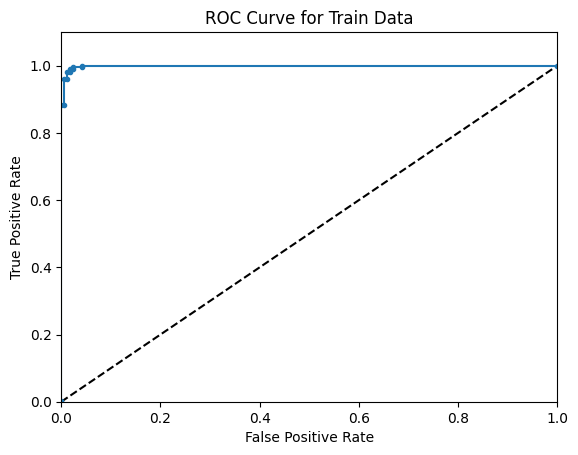

Confusion Matrix for Train Data:

+------------------+------------------+---------------------+
|                  | Predicted Benign | Predicted Malignant |
+------------------+------------------+---------------------+
|  Actual Benign   |       284        |          1          |
+------------------+------------------+---------------------+
| Actual Malignant |        5         |         164         |
+------------------+------------------+---------------------+
CPU times: total: 1min 14s
Wall time: 1min 14s


In [79]:
%%time
[supAvgTrainAccuracy, supAvgTestAccuracy, supAvgTrainPrecision, supAvgTestPrecision, supAvgTrainRecall, supAvgTestRecall, supAvgTrainFScore, supAvgTestFScore, supAvgTrainAUC, supAvgTestAUC] = [0.0]*10
simulatedM, testSize = 30, 0.2
for m in range(0, simulatedM):
    trainMalignData, testMalignData = train_test_split(malignData, test_size=0.2, shuffle=True)
    trainBenignData, testBenignData = train_test_split(benignData, test_size=0.2, shuffle=True)
    
    trainMData = pd.concat([trainMalignData, trainBenignData])
    testMData = pd.concat([testMalignData, testBenignData])
    
    CRange = np.logspace(-1, 4, 20)
    l1SVMModel = LinearSVC(penalty='l1', dual=False)
    l1Parameters = {'C':CRange}
    l1GridModel = GridSearchCV(l1SVMModel, l1Parameters, cv=KFold(5))
    l1GridModel = l1GridModel.fit(trainMData[features], trainMData['Class'])
    
    predictedTrainClass = l1GridModel.predict(trainMData[features])
    predictedTestClass = l1GridModel.predict(testMData[features])
    
    trainAccuracy = accuracy_score(predictedTrainClass, np.array(trainMData['Class']))
    trainAccuracy = round(trainAccuracy, 3)
    
    testAccuracy = accuracy_score(predictedTestClass, np.array(testMData['Class']))
    testAccuracy = round(testAccuracy, 3)
    
    trainTN, trainTP, trainFN, trainFP = getConfusionMatrix(predictedTrainClass, np.array(trainMData['Class']))
    testTN, testTP, testFN, testFP = getConfusionMatrix(predictedTestClass, np.array(testMData['Class']))

    trainPrecision = round(safe_divide(trainTP, trainTP + trainFP), 3)
    testPrecision = round(safe_divide(testTP, testTP + testFP), 3)
    trainRecall = round(safe_divide(trainTP, trainTP + trainFN), 3)
    testRecall = round(safe_divide(testTP, testTP + testFN), 3)
    trainFScore = round(safe_divide(2 * trainPrecision * trainRecall, trainPrecision + trainRecall), 3)
    testFScore = round(safe_divide(2 * testPrecision * testRecall, testPrecision + testRecall), 3)
    
    supAvgTrainAccuracy += trainAccuracy
    supAvgTestAccuracy += testAccuracy
    supAvgTrainPrecision += trainPrecision
    supAvgTestPrecision += testPrecision
    supAvgTrainRecall += trainRecall
    supAvgTestRecall += testRecall
    supAvgTrainFScore += trainFScore
    supAvgTestFScore += testFScore
    actualTrainClass = np.array(trainMData['Class'])
    actualTestClass = np.array(testMData['Class'])
    predTrainClassProb = l1GridModel.decision_function(trainMData[features])
    predTestClassProb = l1GridModel.decision_function(testMData[features])
    
    for i in range(0, len(predTrainClassProb)):
        predTrainClassProb[i] = -1*predTrainClassProb[i]
    for i in range(0, len(predTestClassProb)):
        predTestClassProb[i] = -1*predTestClassProb[i]
        
    trainFPR, trainTPR, trainThreshold = roc_curve(actualTrainClass, predTrainClassProb, pos_label='B')
    testFPR, testTPR, testThreshold = roc_curve(actualTestClass, predTestClassProb, pos_label='B')
    
    trainAUC = auc(trainFPR, trainTPR)
    trainAUC = round(trainAUC, 3)
    supAvgTrainAUC += trainAUC
    
    testAUC = auc(testFPR, testTPR)
    testAUC = round(testAUC, 3)
    supAvgTestAUC += testAUC
    
print(f"TRAIN DATA EVALUATION\n")
print(f"Average Train Accuracy: {round(supAvgTrainAccuracy/simulatedM,3)}; Average Train Precision: {round(supAvgTrainPrecision/simulatedM,3)}; Average Train Recall: {round(supAvgTrainRecall/simulatedM,3)}; Average Train F-Score: {round(supAvgTrainFScore/simulatedM,3)}; Average Train AUC: {round(supAvgTrainAUC/simulatedM,3)}")     
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(trainFPR, trainTPR, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Train Data")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()
print(f"Confusion Matrix for Train Data:\n")
printConfusionMatrix(trainTN, trainFP, trainFN, trainTP)

#### (ii) Semi-Supervised Learning/ Self-training

In [62]:
def safe_divide(numerator, denominator):
    if denominator == 0:
        return 0
    return numerator/denominator

##### (A)

TRAIN DATA EVALUATION
Average Train Accuracy: 0.977; Average Train Precision: 0.976; Average Train Recall: 0.987; Average Train F-Score: 0.982; Average Train AUC: 0.994


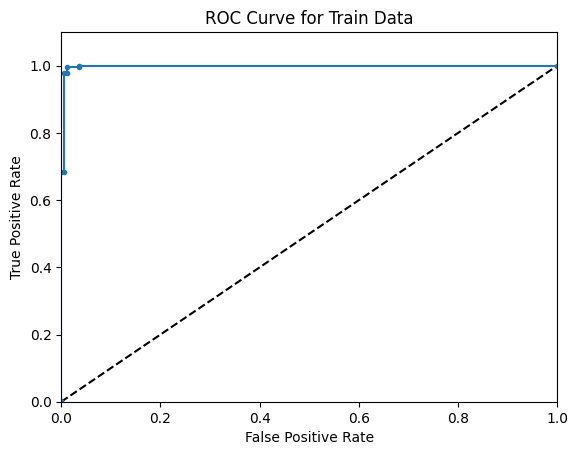

Confusion Matrix for Train Data:
+------------------+------------------+---------------------+
|                  | Predicted Benign | Predicted Malignant |
+------------------+------------------+---------------------+
|  Actual Benign   |       284        |          1          |
+------------------+------------------+---------------------+
| Actual Malignant |        3         |         166         |
+------------------+------------------+---------------------+
CPU times: total: 3h 22min 18s
Wall time: 3h 22min 25s


In [81]:
%%time
semiAvgTrainAccuracy, semiAvgTestAccuracy, semiAvgTrainPrecision, semiAvgTestPrecision, semiAvgTrainRecall, semiAvgTestRecall, semiAvgTrainFScore, semiAvgTestFScore, semiAvgTrainAUC, semiAvgTestAUC = [0.0]*10
for m in range(0, simulatedM):
    trainMalignData, testMalignData = train_test_split(malignData, test_size=0.2, shuffle=True)
    trainBenignData, testBenignData = train_test_split(benignData, test_size=0.2, shuffle=True)
    
    trainMData = pd.concat([trainMalignData, trainBenignData])
    testMData = pd.concat([testMalignData, testBenignData])
    
    labeledMalignData, unlabeledMalignData = train_test_split(trainMalignData, train_size=0.5)
    labeledBenignData, unlabeledBenignData = train_test_split(trainBenignData, train_size=0.5)
    
    labeledTrainData = pd.concat([labeledMalignData, labeledBenignData]) 
    labeledTrainData = labeledTrainData.drop(['ID'], axis=1)
    unlabeledTrainData = pd.concat([unlabeledMalignData, unlabeledBenignData]) 
    unlabeledTrainData = unlabeledTrainData.drop(['ID'], axis=1)
    
    # 1.b(ii)(A)
    CRange = np.logspace(-1, 4, 20)
    l1SVMModel = LinearSVC(penalty='l1', dual=False)
    l1Parameters = {'C':CRange}
    l1GridModel = GridSearchCV(l1SVMModel, l1Parameters, cv=KFold(5))
    l1GridModel = l1GridModel.fit(labeledTrainData[features], labeledTrainData['Class'])
    
    # 1.b(ii)(B)
    while len(unlabeledTrainData)!=0:
        unlabledDistances = l1GridModel.decision_function(unlabeledTrainData[features])
        unlabledDistancesDict = {}
        t = 0
        for idx in unlabeledTrainData.index:
            unlabledDistancesDict[idx] = round(abs(unlabledDistances[t]), 3)
            t += 1
        unlabledDistancesSorted = sorted(unlabledDistancesDict.items(), key=operator.itemgetter(1), reverse=True)
        farthestDataPointIdx = unlabledDistancesSorted[0][0]
        predictedLabel = l1GridModel.predict([unlabeledTrainData.loc[farthestDataPointIdx][features]])
        predictedClassDF = pd.DataFrame(predictedLabel, columns=['Class'])
        predictedClassDF.set_index(pd.Series([farthestDataPointIdx]), inplace=True)
        featureData = pd.DataFrame([unlabeledTrainData.loc[farthestDataPointIdx][features]])
        newLabeledData = pd.merge(featureData, predictedClassDF, left_index=True, right_index=True)

        labeledTrainData = pd.concat([labeledTrainData, newLabeledData])
        unlabeledTrainData = unlabeledTrainData.drop(index=farthestDataPointIdx)

        l1GridModel = l1GridModel.fit(labeledTrainData[features], labeledTrainData['Class'])
        
    predictedTrainClass = l1GridModel.predict(trainMData[features])
    predictedTestClass = l1GridModel.predict(testMData[features])
    
    trainAccuracy = accuracy_score(predictedTrainClass, np.array(trainMData['Class']))
    trainAccuracy = round(trainAccuracy, 3)
    
    testAccuracy = accuracy_score(predictedTestClass, np.array(testMData['Class']))
    testAccuracy = round(testAccuracy, 3)
    
    trainTN, trainTP, trainFN, trainFP = getConfusionMatrix(predictedTrainClass, np.array(trainMData['Class']))
    testTN, testTP, testFN, testFP = getConfusionMatrix(predictedTestClass, np.array(testMData['Class']))
    
    trainPrecision = round(safe_divide(trainTP, trainTP + trainFP), 3)
    testPrecision = round(safe_divide(testTP, testTP + testFP), 3)
    trainRecall = round(safe_divide(trainTP, trainTP + trainFN), 3)
    testRecall = round(safe_divide(testTP, testTP + testFN), 3)
    trainFScore = round(safe_divide(2 * trainPrecision * trainRecall, trainPrecision + trainRecall), 3)
    testFScore = round(safe_divide(2 * testPrecision * testRecall, testPrecision + testRecall), 3)
    
    semiAvgTrainAccuracy += trainAccuracy
    semiAvgTestAccuracy += testAccuracy
    semiAvgTrainPrecision += trainPrecision
    semiAvgTestPrecision += testPrecision
    semiAvgTrainRecall += trainRecall
    semiAvgTestRecall += testRecall
    semiAvgTrainFScore += trainFScore
    semiAvgTestFScore += testFScore
    actualTrainClass = np.array(trainMData['Class'])
    actualTestClass = np.array(testMData['Class'])
    predTrainClassProb = l1GridModel.decision_function(trainMData[features])
    predTestClassProb = l1GridModel.decision_function(testMData[features])
    
    for i in range(0, len(predTrainClassProb)):
        predTrainClassProb[i] = -1*predTrainClassProb[i]
    for i in range(0, len(predTestClassProb)):
        predTestClassProb[i] = -1*predTestClassProb[i]
    
    trainFPR, trainTPR, trainThreshold = roc_curve(actualTrainClass, predTrainClassProb, pos_label='B')
    testFPR, testTPR, testThreshold = roc_curve(actualTestClass, predTestClassProb, pos_label='B')
    
    trainAUC = round(auc(trainFPR, trainTPR), 3)
    semiAvgTrainAUC += trainAUC
    
    testAUC = round(auc(testFPR, testTPR), 3)
    semiAvgTestAUC += testAUC
    
print('TRAIN DATA EVALUATION')
print(f"Average Train Accuracy: {round(semiAvgTrainAccuracy/simulatedM,3)}; Average Train Precision: {round(semiAvgTrainPrecision/simulatedM,3)}; Average Train Recall: {round(semiAvgTrainRecall/simulatedM,3)}; Average Train F-Score: {round(semiAvgTrainFScore/simulatedM,3)}; Average Train AUC: {round(semiAvgTrainAUC/simulatedM,3)}")     
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(trainFPR, trainTPR, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Train Data")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()
print('Confusion Matrix for Train Data:')
printConfusionMatrix(trainTN, trainFP, trainFN, trainTP)

##### (B)

TEST DATA EVALUATION
Average Test Accuracy: 0.954; Average Test Precision: 0.956; Average Test Recall: 0.972; Average Test F-Score: 0.964; Average Test AUC: 0.99


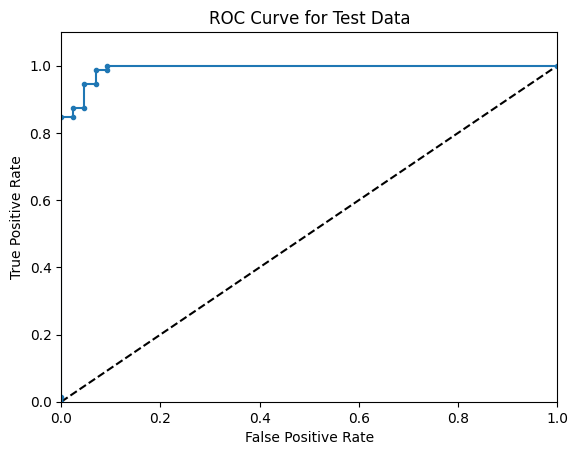

Confusion Matrix for Test Data:
+------------------+------------------+---------------------+
|                  | Predicted Benign | Predicted Malignant |
+------------------+------------------+---------------------+
|  Actual Benign   |        68        |          4          |
+------------------+------------------+---------------------+
| Actual Malignant |        3         |         40          |
+------------------+------------------+---------------------+


In [82]:
print('TEST DATA EVALUATION')
print(f"Average Test Accuracy: {round(semiAvgTestAccuracy/simulatedM,3)}; Average Test Precision: {round(semiAvgTestPrecision/simulatedM,3)}; Average Test Recall: {round(semiAvgTestRecall/simulatedM,3)}; Average Test F-Score: {round(semiAvgTestFScore/simulatedM,3)}; Average Test AUC: {round(semiAvgTestAUC/simulatedM,3)}")     
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(testFPR, testTPR, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Test Data")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()
print('Confusion Matrix for Test Data:')
printConfusionMatrix(testTN, testFP, testFN, testTP)

#### (iii) Unsupervised Learning

##### (A)

TRAIN DATA EVALUATION
Average Train Accuracy: 0.853
Average Train Precision: 0.812
Average Train Recall: 0.997
Average Train F-Score: 0.895
Average Train AUC: 0.91


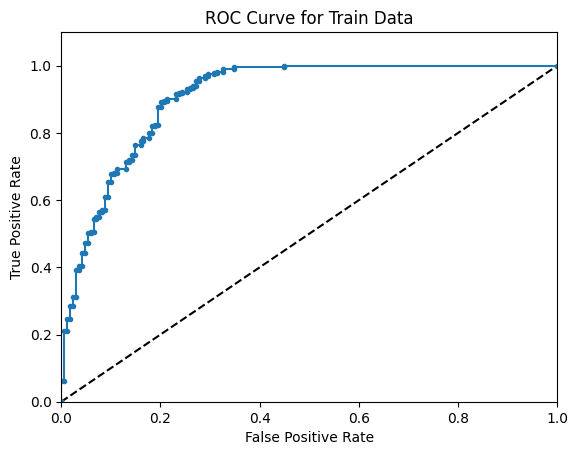

Confusion Matrix for Train Data:
+------------------+------------------+---------------------+
|                  | Predicted Benign | Predicted Malignant |
+------------------+------------------+---------------------+
|  Actual Benign   |       284        |          1          |
+------------------+------------------+---------------------+
| Actual Malignant |        66        |         103         |
+------------------+------------------+---------------------+


In [83]:
clusterMCentroids = {}
clusterTestMData = {}
clusterMLabels = {}
clusterAvgTrainAccuracy = 0.0
clusterAvgTrainPrecision = 0.0
clusterAvgTrainRecall = 0.0
clusterAvgTrainFScore = 0.0
clusterAvgTrainAUC = 0.0
clusterAvgTestAccuracy = 0.0
clusterAvgTestPrecision = 0.0
clusterAvgTestRecall = 0.0
clusterAvgTestFScore = 0.0
clusterAvgTestAUC = 0.0

for m in range(0, simulatedM):
    trainMalignData, testMalignData = train_test_split(malignData, test_size=0.2, shuffle=True)
    trainBenignData, testBenignData = train_test_split(benignData, test_size=0.2, shuffle=True)
    
    trainMData = pd.concat([trainMalignData, trainBenignData])
    trainMData = trainMData.reset_index()
    testMData = pd.concat([testMalignData, testBenignData])
    testMData = testMData.reset_index()
    clusterTestMData[m] = testMData
    
    kMeansModel = KMeans(n_clusters=2, init='random')
    kMeansModel = kMeansModel.fit(trainMData[features])
    
    clusterCenters = kMeansModel.cluster_centers_
    clusterMCentroids[m] = clusterCenters
    
    clusterSampleDistances = euclidean_distances(trainMData[features], clusterCenters)

    firstCluster = {}
    secondCluster = {}
    for i in range(0, len(trainMData)):
        firstCluster[i] = clusterSampleDistances[i][0]
        secondCluster[i] = clusterSampleDistances[i][1]
    firstClusterSorted = sorted(firstCluster.items(), key=operator.itemgetter(1))
    secondClusterSorted = sorted(secondCluster.items(), key=operator.itemgetter(1))
    
    firstLabelCnt = {}
    for i in range(0, 30):
        sampleIdx = firstClusterSorted[i][0]
        label = trainMData['Class'][sampleIdx]
        if label in firstLabelCnt.keys():
            firstLabelCnt[label] += 1
        else:
            firstLabelCnt[label] = 1
    firstLabelCntSorted = sorted(firstLabelCnt.items(), key=operator.itemgetter(1), reverse=True)
    firstClusterLabel = firstLabelCntSorted[0][0]
    
    secondLabelCnt = {}
    for i in range(0, 30):
        sampleIdx = secondClusterSorted[i][0]
        label = trainMData['Class'][sampleIdx]
        if label in secondLabelCnt.keys():
            secondLabelCnt[label] += 1
        else:
            secondLabelCnt[label] = 1
    secondLabelCntSorted = sorted(secondLabelCnt.items(), key=operator.itemgetter(1), reverse=True)
    secondClusterLabel = secondLabelCntSorted[0][0]
    
    clusterLabels = []
    clusterLabels.append(firstClusterLabel)
    clusterLabels.append(secondClusterLabel)
    clusterMLabels[m] = clusterLabels
    
    clusterTrainTP = 0
    clusterTrainTN = 0
    clusterTrainFP = 0
    clusterTrainFN = 0
    for i in range(0, len(clusterSampleDistances)):
        firstClusterDict = clusterSampleDistances[i][0]
        secondClusterDist = clusterSampleDistances[i][1]
        if firstClusterDict<secondClusterDist:
            if trainMData['Class'][i]=='B':
                if firstClusterLabel=='B':
                    clusterTrainTP += 1
                else:
                    clusterTrainFN += 1
            else:
                if firstClusterLabel=='M':
                    clusterTrainTN += 1
                else:
                    clusterTrainFP += 1
        else:
            if trainMData['Class'][i]=='B':
                if secondClusterLabel=='B':
                    clusterTrainTP += 1
                else:
                    clusterTrainFN += 1
            else:
                if secondClusterLabel=='M':
                    clusterTrainTN += 1
                else:
                    clusterTrainFP += 1
    
    clusterTrainAccuracy = (clusterTrainTP+clusterTrainTN)/len(trainMData)
    clusterTrainAccuracy = round(clusterTrainAccuracy, 3)
    
    clusterTrainPrecision = clusterTrainTP/(clusterTrainTP+clusterTrainFP)
    clusterTrainPrecision = round(clusterTrainPrecision, 3)
    
    clusterTrainRecall = clusterTrainTP/(clusterTrainTP+clusterTrainFN)
    clusterTrainRecall = round(clusterTrainRecall, 3)
    
    clusterTrainFScore = (2*clusterTrainPrecision*clusterTrainRecall)/(clusterTrainPrecision+clusterTrainRecall)
    clusterTrainFScore = round(clusterTrainFScore, 3)
    
    clusterTrainActualClass  = np.array(trainMData['Class'])
    clusterTrainPredProb = []
    for i in range(0, len(clusterSampleDistances)):
        firstClusterDict = clusterSampleDistances[i][0]
        secondClusterDist = clusterSampleDistances[i][1]
        if firstClusterLabel=='B':
            clusterTrainPredProb.append(-1*firstClusterDict)
        else:
            clusterTrainPredProb.append(-1*secondClusterDist)
    
    clusterTrainFPR, clusterTrainTPR, _ = roc_curve(clusterTrainActualClass, clusterTrainPredProb, pos_label='B')
    
    clusterTrainAUC = auc(clusterTrainFPR, clusterTrainTPR)
    clusterTrainAUC = round(clusterTrainAUC, 3)
    
    clusterAvgTrainAccuracy += clusterTrainAccuracy
    clusterAvgTrainPrecision += clusterTrainPrecision
    clusterAvgTrainRecall += clusterTrainRecall
    clusterAvgTrainFScore += clusterTrainFScore
    clusterAvgTrainAUC += clusterTrainAUC
    
clusterAvgTrainAccuracy /= simulatedM
clusterAvgTrainAccuracy = round(clusterAvgTrainAccuracy, 3)

clusterAvgTrainPrecision /= simulatedM
clusterAvgTrainPrecision = round(clusterAvgTrainPrecision, 3)

clusterAvgTrainRecall /= simulatedM
clusterAvgTrainRecall = round(clusterAvgTrainRecall, 3)

clusterAvgTrainFScore /= simulatedM
clusterAvgTrainFScore = round(clusterAvgTrainFScore, 3)

clusterAvgTrainAUC /= simulatedM
clusterAvgTrainAUC = round(clusterAvgTrainAUC, 3)

print('TRAIN DATA EVALUATION')
print('Average Train Accuracy:', clusterAvgTrainAccuracy)
print('Average Train Precision:', clusterAvgTrainPrecision)
print('Average Train Recall:', clusterAvgTrainRecall)
print('Average Train F-Score:', clusterAvgTrainFScore)
print('Average Train AUC:', clusterAvgTrainAUC)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(clusterTrainFPR, clusterTrainTPR, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Train Data")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()
print('Confusion Matrix for Train Data:')
printConfusionMatrix(clusterTrainTN, clusterTrainFP, clusterTrainFN, clusterTrainTP)

##### (B)

TEST DATA EVALUATION
Average Test Accuracy: 0.839
Average Test Precision: 0.797
Average Test Recall: 0.997
Average Test F-Score: 0.886
Average Test AUC: 0.903


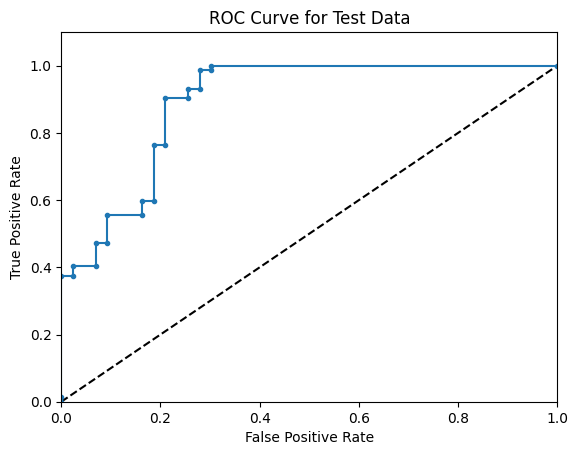

Confusion Matrix for Test Data:
+------------------+------------------+---------------------+
|                  | Predicted Benign | Predicted Malignant |
+------------------+------------------+---------------------+
|  Actual Benign   |        72        |          0          |
+------------------+------------------+---------------------+
| Actual Malignant |        17        |         26          |
+------------------+------------------+---------------------+


In [84]:
for m in range(0, simulatedM):
    testMData = clusterTestMData[m]
    clusterTestDist = euclidean_distances(testMData[features], clusterMCentroids[m])
    clusterLabels = clusterMLabels[m]
    firstClusterLabel = clusterLabels[0]
    secondClusterLabel = clusterLabels[1]
    
    clusterTestTP = 0
    clusterTestTN = 0
    clusterTestFP = 0
    clusterTestFN = 0
    for i in range(0, len(clusterTestDist)):
        firstClusterDict = clusterTestDist[i][0]
        secondClusterDist = clusterTestDist[i][1]
        if firstClusterDict<secondClusterDist:
            if testMData['Class'][i]=='B':
                if firstClusterLabel=='B':
                    clusterTestTP += 1
                else:
                    clusterTestFN += 1
            else:
                if firstClusterLabel=='M':
                    clusterTestTN += 1
                else:
                    clusterTestFP += 1
        else:
            if testMData['Class'][i]=='B':
                if secondClusterLabel=='B':
                    clusterTestTP += 1
                else:
                    clusterTestFN += 1
            else:
                if secondClusterLabel=='M':
                    clusterTestTN += 1
                else:
                    clusterTestFP += 1
    
    clusterTestAccuracy = (clusterTestTP+clusterTestTN)/len(testMData)
    clusterTestAccuracy = round(clusterTestAccuracy, 3)
    
    clusterTestPrecision = clusterTestTP/(clusterTestTP+clusterTestFP)
    clusterTestPrecision = round(clusterTestPrecision, 3)
    
    clusterTestRecall = clusterTestTP/(clusterTestTP+clusterTestFN)
    clusterTestRecall = round(clusterTestRecall, 3)
    
    clusterTestFScore = (2*clusterTestPrecision*clusterTestRecall)/(clusterTestPrecision+clusterTestRecall)
    clusterTestFScore = round(clusterTestFScore, 3)
    
    clusterTestActualClass  = np.array(testMData['Class'])
    clusterTestPredProb = []
    for i in range(0, len(clusterTestDist)):
        firstClusterDict = clusterTestDist[i][0]
        secondClusterDist = clusterTestDist[i][1]
        if firstClusterLabel=='B':
            clusterTestPredProb.append(-1*firstClusterDict)
        else:
            clusterTestPredProb.append(-1*secondClusterDist)
    
    clusterTestFPR, clusterTestTPR, _ = roc_curve(clusterTestActualClass, clusterTestPredProb, pos_label='B')
    
    clusterTestAUC = auc(clusterTestFPR, clusterTestTPR)
    clusterTestAUC = round(clusterTestAUC, 3)
    
    clusterAvgTestAccuracy += clusterTestAccuracy
    clusterAvgTestPrecision += clusterTestPrecision
    clusterAvgTestRecall += clusterTestRecall
    clusterAvgTestFScore += clusterTestFScore
    clusterAvgTestAUC += clusterTestAUC
    
clusterAvgTestAccuracy /= simulatedM
clusterAvgTestAccuracy = round(clusterAvgTestAccuracy, 3)
clusterAvgTestPrecision /= simulatedM
clusterAvgTestPrecision = round(clusterAvgTestPrecision, 3)
clusterAvgTestRecall /= simulatedM
clusterAvgTestRecall = round(clusterAvgTestRecall, 3)
clusterAvgTestFScore /= simulatedM
clusterAvgTestFScore = round(clusterAvgTestFScore, 3)
clusterAvgTestAUC /= simulatedM
clusterAvgTestAUC = round(clusterAvgTestAUC, 3)

print('TEST DATA EVALUATION')
print('Average Test Accuracy:', clusterAvgTestAccuracy)
print('Average Test Precision:', clusterAvgTestPrecision)
print('Average Test Recall:', clusterAvgTestRecall)
print('Average Test F-Score:', clusterAvgTestFScore)
print('Average Test AUC:', clusterAvgTestAUC)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(clusterTestFPR, clusterTestTPR, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Test Data")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()
print('Confusion Matrix for Test Data:')
printConfusionMatrix(clusterTestTN, clusterTestFP, clusterTestFN, clusterTestTP)

#### (iv) Spectral Clustering

In [88]:
def getClusterLabel(firstMCnt, firstBCnt, secondMCnt, secondBCnt):
    firstLabel = ''
    secondLabel = ''
    if firstMCnt>firstBCnt:
        firstLabel = 'M'
    elif firstBCnt>firstMCnt:
        firstLabel = 'B'
        
    if secondMCnt>secondBCnt:
        secondLabel = 'M'
    elif secondBCnt>secondMCnt:
        secondLabel = 'B'
        
    if firstLabel=='' and secondLabel!='':
        if secondLabel == 'M':
            firstLabel = 'B'
        else:
            firstLabel = 'M'
    elif firstLabel!='' and secondLabel=='':
        if firstLabel=='M':
            secondLabel = 'B'
        else:
            secondLabel = 'M'
    else:
        if firstBCnt>secondBCnt:
            firstLabel = 'B'
            secondLabel = 'M'
        else:
            firstLabel = 'M'
            secondLabel = 'B'
    return firstLabel, secondLabel

In [86]:
def getClusterCentroids(clusterLabels, data):
    centroids = np.zeros((2, data.shape[1]))
    sampleCnt = np.zeros(2)
    for i in range(0, len(clusterLabels)):
        label = clusterLabels[i]
        sampleCnt[label] += 1
        centroids[label] += data[i:i+1]
    for i in range(0, 2):
        if sampleCnt[i]!=0:
            centroids[i] /= sampleCnt[i]
    return centroids

TRAIN DATA EVALUATION
Average Train Accuracy: 0.598
Average Train Precision: 0.635
Average Train Recall: 0.86
Average Train F-Score: 0.715
Average Train AUC: 0.625


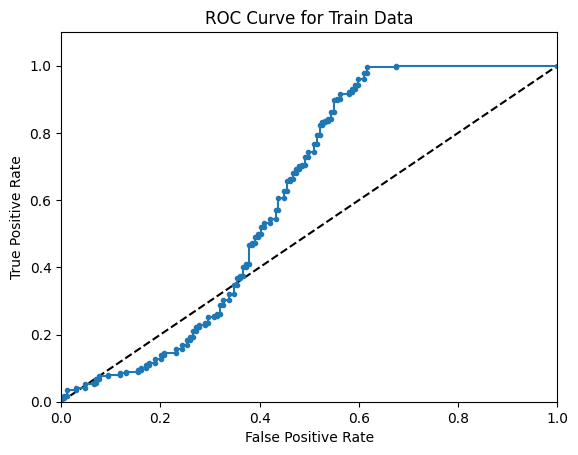

Confusion Matrix for Train Data:
+------------------+------------------+---------------------+
|                  | Predicted Benign | Predicted Malignant |
+------------------+------------------+---------------------+
|  Actual Benign   |       285        |          0          |
+------------------+------------------+---------------------+
| Actual Malignant |       169        |          0          |
+------------------+------------------+---------------------+


In [89]:
specClusterMCentroids = {}
specClusterTestMData = {}
specClusterMLabels = {}
specAvgTrainAccuracy = 0.0
specAvgTrainPrecision = 0.0
specAvgTrainRecall = 0.0
specAvgTrainFScore = 0.0
specAvgTrainAUC = 0.0
specAvgTestAccuracy = 0.0
specAvgTestPrecision = 0.0
specAvgTestRecall = 0.0
specAvgTestFScore = 0.0
specAvgTestAUC = 0.0

for m in range(0, simulatedM):
    trainMalignData, testMalignData = train_test_split(malignData, test_size=0.2, shuffle=True)
    trainBenignData, testBenignData = train_test_split(benignData, test_size=0.2, shuffle=True)
    
    trainMData = pd.concat([trainMalignData, trainBenignData])
    trainMData = trainMData.reset_index()
    testMData = pd.concat([testMalignData, testBenignData])
    testMData = testMData.reset_index()
    specClusterTestMData[m] = testMData
    
    spectralModel = SpectralClustering(n_clusters=2, gamma=1.0, eigen_tol=1.0, assign_labels='discretize')
    labels = spectralModel.fit_predict(trainMData[features])
    
    clusterCentroid = getClusterCentroids(labels, trainMData[features])
    specClusterMCentroids[m] = clusterCentroid
    
    specClusterTrainDist = euclidean_distances(trainMData[features], clusterCentroid)
    
    # Find count of class samples in each cluster
    firstMCnt = 0
    firstBCnt = 0
    secondMCnt = 0
    secondBCnt = 0
    for j in range(0, len(labels)):
        if labels[j]==0:
            if trainMData['Class'][j]=='M':
                firstMCnt += 1
            else:
                firstBCnt += 1
        else:
            if trainMData['Class'][j]=='M':
                secondMCnt += 1
            else:
                secondBCnt += 1
    
    # Assign cluster label
    firstLabel, secondLabel = getClusterLabel(firstMCnt, firstBCnt, secondMCnt, secondBCnt)        
    specClusterLabels = []
    specClusterLabels.append(firstLabel)
    specClusterLabels.append(secondLabel)
    specClusterMLabels[m] = specClusterLabels
        
    # Calculate TP, TN, FN and FP
    specTrainTP = 0
    specTrainTN = 0
    specTrainFP = 0
    specTrainFN = 0
    for i in range(0, len(trainMData)):
        actualLabel = trainMData['Class'][i]
        if labels[i]==0:
            if firstLabel=='B' and actualLabel=='B':
                specTrainTP += 1
            elif firstLabel=='B' and actualLabel=='M':
                specTrainFP += 1
            elif firstLabel=='M' and actualLabel=='B':
                specTrainFN += 1
            else:
                specTrainTN += 1
        else:
            if secondLabel=='B' and actualLabel=='B':
                specTrainTP += 1
            elif secondLabel=='B' and actualLabel=='M':
                specTrainFP += 1
            elif secondLabel=='M' and actualLabel=='B':
                specTrainFN += 1
            else:
                specTrainTN += 1
                
    specTrainAccuracy = (specTrainTP+specTrainTN)/len(trainMData)
    specTrainAccuracy = round(specTrainAccuracy, 3)
    
    specTrainPrecision = specTrainTP/(specTrainTP+specTrainFP)
    specTrainPrecision = round(specTrainPrecision, 3)
    
    specTrainRecall = specTrainTP/(specTrainTP+specTrainFN)
    specTrainRecall = round(specTrainRecall, 3)
    
    specTrainFScore = (2*specTrainPrecision*specTrainRecall)/(specTrainPrecision+specTrainRecall)
    specTrainFScore = round(specTrainFScore, 3)
    
    specTrainActualClass  = np.array(trainMData['Class'])
    specTrainPredProb = []
    for i in range(0, len(specClusterTrainDist)):
        firstClusterDist = specClusterTrainDist[i][0]
        secondClusterDist = specClusterTrainDist[i][1]
        if firstClusterLabel=='B':
            specTrainPredProb.append(-1*firstClusterDist)
        else:
            specTrainPredProb.append(-1*secondClusterDist)
    
    specTrainFPR, specTrainTPR, _ = roc_curve(specTrainActualClass, specTrainPredProb, pos_label='B')
    
    specTrainAUC = auc(specTrainFPR, specTrainTPR)
    specTrainAUC = round(specTrainAUC, 3)
    
    specAvgTrainAccuracy += specTrainAccuracy
    specAvgTrainPrecision += specTrainPrecision
    specAvgTrainRecall += specTrainRecall
    specAvgTrainFScore += specTrainFScore
    specAvgTrainAUC += specTrainAUC
    
specAvgTrainAccuracy /= simulatedM
specAvgTrainAccuracy = round(specAvgTrainAccuracy, 3)
specAvgTrainPrecision /= simulatedM
specAvgTrainPrecision = round(specAvgTrainPrecision, 3)
specAvgTrainRecall /= simulatedM
specAvgTrainRecall = round(specAvgTrainRecall, 3)
specAvgTrainFScore /= simulatedM
specAvgTrainFScore = round(specAvgTrainFScore, 3)
specAvgTrainAUC /= simulatedM
specAvgTrainAUC = round(specAvgTrainAUC, 3)
print('TRAIN DATA EVALUATION')
print('Average Train Accuracy:', specAvgTrainAccuracy)
print('Average Train Precision:', specAvgTrainPrecision)
print('Average Train Recall:', specAvgTrainRecall)
print('Average Train F-Score:', specAvgTrainFScore)
print('Average Train AUC:', specAvgTrainAUC)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(specTrainFPR, specTrainTPR, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Train Data")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()
print('Confusion Matrix for Train Data:')
printConfusionMatrix(specTrainTN, specTrainFP, specTrainFN, specTrainTP)

TEST DATA EVALUATION
Average Test Accuracy: 0.554
Average Test Precision: 0.603
Average Test Recall: 0.773
Average Test F-Score: 0.675
Average Test AUC: 0.589


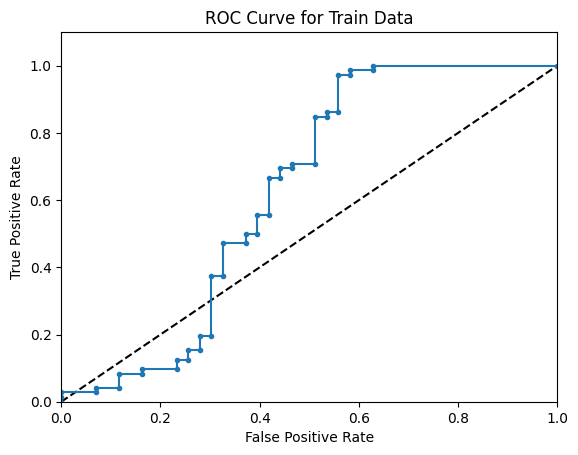

Confusion Matrix for Train Data:
+------------------+------------------+---------------------+
|                  | Predicted Benign | Predicted Malignant |
+------------------+------------------+---------------------+
|  Actual Benign   |        52        |         20          |
+------------------+------------------+---------------------+
| Actual Malignant |        43        |          0          |
+------------------+------------------+---------------------+


In [91]:
for m in range(0, simulatedM):
    testMData = specClusterTestMData[m]
    specClusterTestDist = euclidean_distances(testMData[features], specClusterMCentroids[m])
    
    specClusterLabels = specClusterMLabels[m]
    specFirstLabel = specClusterLabels[0]
    specSecondLabel = specClusterLabels[1]
    
    specTestTP = 0
    specTestTN = 0
    specTestFP = 0
    specTestFN = 0
    for i in range(0, len(specClusterTestDist)):
        specFirstClusterDict = specClusterTestDist[i][0]
        specSecondClusterDist = specClusterTestDist[i][1]
        if specFirstClusterDict<specSecondClusterDist:
            if testMData['Class'][i]=='B':
                if specFirstLabel=='B':
                    specTestTP += 1
                else:
                    specTestFN += 1
            else:
                if specFirstLabel=='M':
                    specTestTN += 1
                else:
                    specTestFP += 1
        else:
            if testMData['Class'][i]=='B':
                if specSecondLabel=='B':
                    specTestTP += 1
                else:
                    specTestFN += 1
            else:
                if specSecondLabel=='M':
                    specTestTN += 1
                else:
                    specTestFP += 1
                
    specTestAccuracy = (specTestTP+specTestTN)/len(testMData)
    specTestAccuracy = round(specTestAccuracy, 3)
    
    specTestPrecision = specTestTP/(specTestTP+specTestFP)
    specTestPrecision = round(specTestPrecision, 3)
    
    specTestRecall = specTestTP/(specTestTP+specTestFN)
    specTestRecall = round(specTestRecall, 3)
    
    specTestFScore = (2*specTestPrecision*specTestRecall)/(specTestPrecision+specTestRecall)
    specTestFScore = round(specTestFScore, 3)
    
    specTestActualClass  = np.array(testMData['Class'])
    specTestPredProb = []
    for i in range(0, len(specClusterTestDist)):
        firstClusterDist = specClusterTestDist[i][0]
        secondClusterDist = specClusterTestDist[i][1]
        if firstClusterLabel=='B':
            specTestPredProb.append(-1*firstClusterDist)
        else:
            specTestPredProb.append(-1*secondClusterDist)
    
    specTestFPR, specTestTPR, _ = roc_curve(specTestActualClass, specTestPredProb, pos_label='B')
    
    specTestAUC = auc(specTestFPR, specTestTPR)
    specTestAUC = round(specTestAUC, 3)
    
    specAvgTestAccuracy += specTestAccuracy
    specAvgTestPrecision += specTestPrecision
    specAvgTestRecall += specTestRecall
    specAvgTestFScore += specTestFScore
    specAvgTestAUC += specTestAUC
    
specAvgTestAccuracy /= simulatedM
specAvgTestAccuracy = round(specAvgTestAccuracy, 3)
specAvgTestPrecision /= simulatedM
specAvgTestPrecision = round(specAvgTestPrecision, 3)
specAvgTestRecall /= simulatedM
specAvgTestRecall = round(specAvgTestRecall, 3)
specAvgTestFScore /= simulatedM
specAvgTestFScore = round(specAvgTestFScore, 3)
specAvgTestAUC /= simulatedM
specAvgTestAUC = round(specAvgTestAUC, 3)
print('TEST DATA EVALUATION')
print('Average Test Accuracy:', specAvgTestAccuracy)
print('Average Test Precision:', specAvgTestPrecision)
print('Average Test Recall:', specAvgTestRecall)
print('Average Test F-Score:', specAvgTestFScore)
print('Average Test AUC:', specAvgTestAUC)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(specTestFPR, specTestTPR, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve for Train Data")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.show()
print('Confusion Matrix for Train Data:')
printConfusionMatrix(specTestTN, specTestFP, specTestFN, specTestTP)

#### (iv) Compare

In [105]:
data_dict = {
    '': ['Average Train Accuracy', 'Average Test Accuracy', 'Average Train Precision', 'Average Test Precision', 'Average Train Recall', 
         'Average Test Recall', 'Average Train F-Score', 'Average Test F-Score', 'Average Train AUC', 'Average Test AUC'],
    'Supervised Learning': [supAvgTrainAccuracy, supAvgTestAccuracy, supAvgTrainPrecision, supAvgTestPrecision, supAvgTrainRecall, 
                            supAvgTestRecall, supAvgTrainFScore, supAvgTestFScore, supAvgTrainAUC, supAvgTestAUC],
    'Semi-Supervised Learning': [semiAvgTrainAccuracy, semiAvgTestAccuracy, semiAvgTrainPrecision, semiAvgTestPrecision, semiAvgTrainRecall, 
                                 semiAvgTestRecall, semiAvgTrainFScore, semiAvgTestFScore, semiAvgTrainAUC, semiAvgTestAUC],
    'Unsupervised Learning': [clusterAvgTrainAccuracy, clusterAvgTestAccuracy, clusterAvgTrainPrecision, clusterAvgTestPrecision, clusterAvgTrainRecall, 
                              clusterAvgTestRecall, clusterAvgTrainFScore, clusterAvgTestFScore, clusterAvgTrainAUC, clusterAvgTestAUC]
}
df = pd.DataFrame(data_dict)
df.set_index('', inplace=True)
df

,Supervised Learning,Semi-Supervised Learning,Unsupervised Learning
,,,
Average Train Accuracy,29.601,29.312,0.853
Average Test Accuracy,29.072,28.627,0.839
Average Train Precision,29.543,29.292,0.812
Average Test Precision,29.143,28.686,0.797
Average Train Recall,29.818,29.619,0.997
Average Test Recall,29.385,29.163,0.997
Average Train F-Score,29.675,29.450,0.895
Average Test F-Score,29.256,28.910,0.886
Average Train AUC,29.960,29.813,0.910


## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [113]:
data = pd.read_csv('../data/data_banknote_authentication.txt',names=['variance','skewness','kurtosis','entropy','class'])
data

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [114]:
X=data.drop('class',axis=1)
Y=data.loc[:,'class']

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [119]:
params = {'C':[0.01,0.1,1,10,100]}
final_result=pd.DataFrame()
avg_error_passive=[]

for p in range(0,50):
    dataset= data
    full_test_data = dataset.sample(472,random_state=random.randint(0,100))
    test_ind = full_test_data.index
    full_test_data = full_test_data.reset_index(drop=True)
    full_test_data_x = full_test_data.drop('class',axis=1)
    full_test_data_y = full_test_data['class'] 
    train_data = dataset.drop(index=test_ind)

    err=[]
    new_train = pd.DataFrame()
    
    str_k = StratifiedKFold(n_splits=90)
    X_train_data= train_data.drop(['class'],axis=1)
    y_train_data = train_data['class']
    y_train_data = y_train_data.reset_index(drop=True)
    X_train_data = X_train_data.reset_index(drop=True)

    for train_index,test_index in str_k.split(X_train_data,y_train_data):
        sample_x,sample_y=X_train_data.iloc[test_index], y_train_data.iloc[test_index]
        tr_sample_df= pd.concat([sample_x,sample_y],axis=1)
        new_train = pd.concat([new_train,tr_sample_df],axis=0)
        new_train_x = new_train.drop('class',axis=1)
        new_train_y = new_train['class']
        
        # Training SVM with randomly selected Datapoints
        l_svc=LinearSVC(penalty='l1',dual=False,max_iter=200000)
        l_svc_passive = GridSearchCV(l_svc, params,cv=5)
        l_svc_passive.fit(new_train_x,new_train_y)
        
        pred_y_passive = l_svc_passive.predict(full_test_data_x)
        err.append(1-accuracy_score(full_test_data_y,pred_y_passive))
    
    error_values = pd.Series(err)
    final_result.insert(loc=p, column=p, value=error_values)
    avg_error_passive=final_result.mean(axis=1)

svm_num=range(1,91)
samples_num=list(range(10,910,10))
result=pd.DataFrame({"SVM Number":svm_num,"Number of Samples":samples_num,"AVG Test Error":avg_error_passive})
result

,SVM Number,Number of Samples,AVG Test Error
0,1,10,0.153686
1,2,20,0.071737
2,3,30,0.056229
3,4,40,0.037034
4,5,50,0.023729
...,...,...,...
85,86,860,0.009915
86,87,870,0.009703
87,88,880,0.009661
88,89,890,0.009703


#### (ii) Active

In [126]:
%%time
for i in range(0,1):
    X=data.drop('class',axis=1)
    Y=data.loc[:,'class']
    s_split=StratifiedShuffleSplit(n_splits=5, test_size=472,random_state=0)
    for train_index, test_index in s_split.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.loc[train_index], Y.loc[test_index]
    
    X_train=X_train.reset_index(drop=True)
    X_test=X_test.reset_index(drop=True)
    y_train=y_train.reset_index(drop=True)
    y_test=y_test.reset_index(drop=True)
    
    new_train = pd.DataFrame()
    test_errs = []
    full_train_data = pd.concat([X_train,y_train],axis=1)
    
    tr_sample = full_train_data.sample(n=10,replace=False)
         
    new_train = pd.concat([new_train,tr_sample], axis = 0)
    full_train_data.drop(index=tr_sample.index.tolist(),inplace=True)
    
    new_train_x= new_train.loc[:,new_train.columns[new_train.columns != 'class']]
    new_train_y= new_train.loc[:,'class']

params = {'C':[0.01,0.1,1,10,100,1000]}
avg_test_error1 = [[0 for x in range(0,50)] for y in range(0,90)] 
best_c1=[[0 for x in range(0,50)] for y in range(0,90)] 
final = pd.DataFrame()

for p in range(0,50):
    dataset= data
    full_test_data = dataset.sample(472,random_state=random.randint(0,100))
    test_ind = full_test_data.index
    train_data = data.drop(index=test_ind)
    full_test_data = full_test_data.reset_index(drop=True)
    full_test_data_x = full_test_data.drop('class',axis=1)
    full_test_data_y = full_test_data['class'] 

    str_k = StratifiedKFold(n_splits=90)
    X_train_data= train_data.drop(['class'],axis=1)
    train_data_y = train_data['class']
    train_data_y = train_data_y.reset_index(drop=True)
    X_train_data = X_train_data.reset_index(drop=True)
    new_train=pd.DataFrame()
      
    for train_index,test_index in str_k.split(X_train_data,train_data_y):
        sample_x,sample_y=X_train_data.iloc[test_index], train_data_y.iloc[test_index]
        tr_sample_df= pd.concat([sample_x,sample_y],axis=1)
        new_train = pd.concat([new_train,tr_sample_df],axis=0)
        break
        
    for i in range(0,90):
        X_train_data= X_train_data.reset_index(drop=True)
        
        l1_svc=LinearSVC(penalty='l1',dual=False,max_iter=200000)
        l_svc_active = GridSearchCV(l1_svc, params,cv=5)
        l_svc_active.fit(new_train_x,new_train_y)
        
        closest_pts = (l_svc_active.decision_function(X_train_data))
        closest_pts=np.abs(closest_pts)
        distances =  pd.DataFrame(closest_pts)
        distances = distances.sort_values(0)
        distances = distances.iloc[0:10,]
        distances_index = distances.index
        
        tr_sample  =  train_data.iloc[distances_index,:]
        X_train_data= X_train_data.drop(index = distances_index)

        pred_y = l_svc_active.predict(full_test_data_x)
        
        new_train = pd.concat([new_train,tr_sample],axis=0)
        new_train.reset_index(drop=True,inplace=True)
        new_train_x = new_train.drop('class',axis=1)
        new_train_y = new_train['class']
        avg_test_error1[i][p]=1-accuracy_score(full_test_data_y,pred_y)
    
svm_test_errors1=[]
final_best_c1=[]

for j in range(0,90):
    svm_test_errors1.append(np.round(mean(avg_test_error1[j]),3))
    cntr = Counter(best_c1[j])
    value, count = cntr.most_common()[0]
    final_best_c1.append(value)

svm_num=range(1,91)
samples_num=list(range(10,910,10))
result1=pd.DataFrame({"SVM Number":svm_num,"Number of Samples":samples_num,"AVG Test Error":svm_test_errors1})
result1

CPU times: total: 47min 38s
Wall time: 47min 42s


,SVM Number,Number of Samples,AVG Test Error
0,1,10,0.016
1,2,20,0.144
2,3,30,0.076
3,4,40,0.038
4,5,50,0.030
...,...,...,...
85,86,860,0.011
86,87,870,0.011
87,88,880,0.011
88,89,890,0.011


### (c) Average the 50 test errors

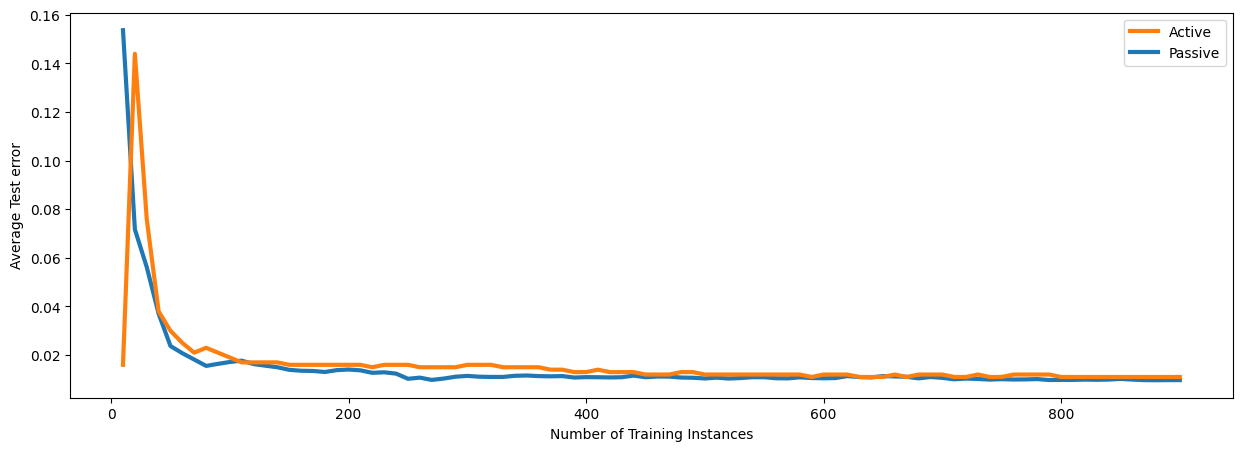

In [127]:
plt.figure(figsize=(15, 5))
passive,=plt.plot(samples_num, avg_error_passive,label='Passive',linewidth=3)
active,=plt.plot(samples_num, svm_test_errors1,label='Active',linewidth=3)
plt.legend(handles=[active,passive])
plt.ylabel('Average Test error')
plt.xlabel('Number of Training Instances')
plt.show()